这篇分析是根据kaggle上的一个信用卡评分项目。数据内容是信用卡用户的年龄、收入、负债情况、逾期次数以及过去两年内的违约情况等信息。项目的目标是根据这些数据建立一个预测模型，分析用户违约的概率，得到用户评分，帮助银行作出决策。此分析也可以扩展到其他领域，如预测用户流失的可能性、疾病预测等。

流程：
    导入数据-数据预处理（填补缺失值、去掉异常值）-对数据进行探索分析-特征选择-建立模型-转换评分

In [1]:
#导入相关库和数据
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams['font.sans-serif'] = ["Arial Unicode MS"]
%matplotlib notebook

path = r"cs-training.csv"
df=pd.read_csv(path)
df.head(5)

,Unnamed: 0,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,1,1,0.766127,45,2,0.802982,9120.0,13,0,6,0,2.0
1,2,0,0.957151,40,0,0.121876,2600.0,4,0,0,0,1.0
2,3,0,0.658180,38,1,0.085113,3042.0,2,1,0,0,0.0
3,4,0,0.233810,30,0,0.036050,3300.0,5,0,0,0,0.0
4,5,0,0.907239,49,1,0.024926,63588.0,7,0,1,0,0.0


In [2]:
#字段比较多，打印出columns查看
print(df.columns)

Index(['Unnamed: 0', 'SeriousDlqin2yrs',
       'RevolvingUtilizationOfUnsecuredLines', 'age',
       'NumberOfTime30-59DaysPastDueNotWorse', 'DebtRatio', 'MonthlyIncome',
       'NumberOfOpenCreditLinesAndLoans', 'NumberOfTimes90DaysLate',
       'NumberRealEstateLoansOrLines', 'NumberOfTime60-89DaysPastDueNotWorse',
       'NumberOfDependents'],
      dtype='object')


In [3]:
#将字段名转换为中文
states = {"Unnamed: 0":"用户ID",
          "SeriousDlqin2yrs":"是否违约",
          "RevolvingUtilizationOfUnsecuredLines":"可用额度比值",
          "age":"年龄",
          "NumberOfTime30-59DaysPastDueNotWorse":"逾期30-59天次数",
          "DebtRatio":"负债率",
          "MonthlyIncome":"月收入",
          "NumberOfOpenCreditLinesAndLoans":"信贷数量",
          "NumberOfTimes90DaysLate":"逾期90天次数",
          "NumberRealEstateLoansOrLines":"不动产贷款量",
          "NumberOfTime60-89DaysPastDueNotWorse":"逾期60-89天次数",
          "NumberOfDependents":"亲属数量"}
df.rename(columns=states, inplace=True)
df.head(5)

,用户ID,是否违约,可用额度比值,年龄,逾期30-59天次数,负债率,月收入,信贷数量,逾期90天次数,不动产贷款量,逾期60-89天次数,亲属数量
0,1,1,0.766127,45,2,0.802982,9120.0,13,0,6,0,2.0
1,2,0,0.957151,40,0,0.121876,2600.0,4,0,0,0,1.0
2,3,0,0.658180,38,1,0.085113,3042.0,2,1,0,0,0.0
3,4,0,0.233810,30,0,0.036050,3300.0,5,0,0,0,0.0
4,5,0,0.907239,49,1,0.024926,63588.0,7,0,1,0,0.0


In [4]:
#数据预处理
#缺失值处理
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150000 entries, 0 to 149999
Data columns (total 12 columns):
用户ID          150000 non-null int64
是否违约          150000 non-null int64
可用额度比值        150000 non-null float64
年龄            150000 non-null int64
逾期30-59天次数    150000 non-null int64
负债率           150000 non-null float64
月收入           120269 non-null float64
信贷数量          150000 non-null int64
逾期90天次数       150000 non-null int64
不动产贷款量        150000 non-null int64
逾期60-89天次数    150000 non-null int64
亲属数量          146076 non-null float64
dtypes: float64(4), int64(8)
memory usage: 13.7 MB


In [5]:
#输出结果显示月收入和亲属数量有缺失
print("月收入缺失比例：%.2f%%" %((150000-120269)/150000*100))
print("亲属数量缺失比例：%.2f%%" %((150000-146076)/150000*100))

月收入缺失比例：19.82%
亲属数量缺失比例：2.62%


In [6]:
#月收入缺失比例高，用平均值填充，亲属数量缺失比例低，删除
df = df.fillna({"月收入":df["月收入"].mean()})
df = df.dropna()
df.shape

(146076, 12)

0    136229
1      9847
Name: 是否违约, dtype: int64

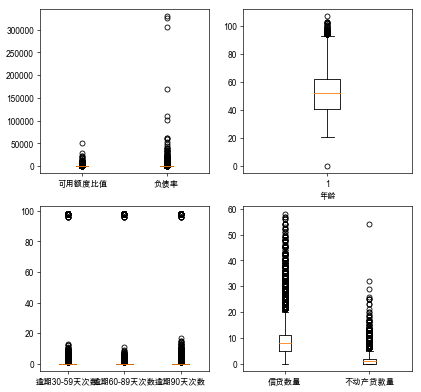

In [7]:
#用箱线图查看是否存在异常值


x1 = df["可用额度比值"]
x2 = df["负债率"]
x3 = df["年龄"]
x4 = df["逾期30-59天次数"]
x5 = df["逾期60-89天次数"]
x6 = df["逾期90天次数"]
x7 = df["信贷数量"]
x8 = df["不动产贷款量"]

fig = plt.figure(figsize=(8,8),dpi=60)
ax1 = fig.add_subplot(2,2,1)
ax2 = fig.add_subplot(2,2,2)
ax3 = fig.add_subplot(2,2,3)
ax4 = fig.add_subplot(2,2,4)

ax1.boxplot([x1,x2])
ax1.set_xticklabels(["可用额度比值","负债率"],fontsize=10)
ax2.boxplot(x3)
ax2.set_xlabel("年龄",fontsize=10)
ax3.boxplot([x4,x5,x6])
ax3.set_xticklabels(["逾期30-59天次数","逾期60-89天次数","逾期90天次数"],fontsize=10)
ax4.boxplot([x7,x8])
ax4.set_xticklabels(["信贷数量","不动产贷款量"],fontsize=10)

#查看”好坏用户“列是否有1和0以外的值
df["是否违约"].value_counts()

In [8]:
#可用额度比值是信用卡可用额度和总额度之比，不应大于1，将大于1的数据删除
#年龄不应为0
#逾期次数大于80的为异常值，删除
#不动产贷款量大于50的为异常值，删除
df = df[df["可用额度比值"]<1]
df = df[df["年龄"]>0]
df = df[df["逾期30-59天次数"]<80]
df = df[df["逾期60-89天次数"]<80]
df = df[df["逾期90天次数"]<80]
df = df[df["不动产贷款量"]<50]
df.shape

(142559, 12)

探索分析
单变量分析针对各指标进行分析，看违约客户与哪些指标有关。

违约客户占比：5.96%


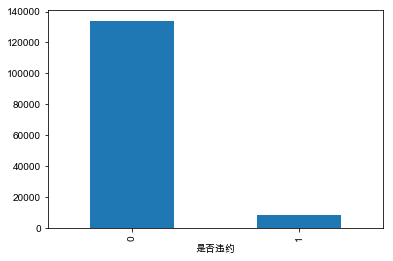

In [9]:
#单变量分析
#查看客户违约整体情况
grouped = df["用户ID"].groupby(df["是否违约"]).count()
grouped.plot.bar()
print("违约客户占比：%.2f%%" %(grouped[1]/df.shape[0]*100))

Text(0.5, 1.0, '年龄分布')

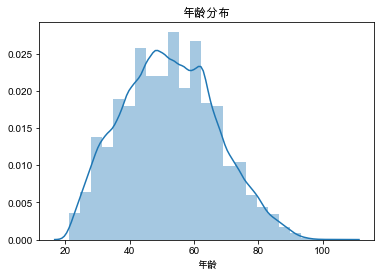

In [10]:
#分析年龄与客户违约有无关系。
#先看一下年龄的分布
plt.figure()
ax10 = sns.distplot(df["年龄"],bins=25)
ax10.set_title("年龄分布")

In [11]:
#将年龄平均分成5组，观察每组的违约客户数和占比
age_group = pd.cut(df["年龄"],5)
age_group_total = df["是否违约"].groupby(age_group).count() #每组总人数
age_group_bad = df["是否违约"].groupby(age_group).sum() #每组中坏客户人数
df1 = pd.merge(pd.DataFrame(age_group_total),pd.DataFrame(age_group_bad),
              left_index=True,right_index=True)
df1.rename(columns={"是否违约_x":"客户总数","是否违约_y":"违约客户数"},inplace=True)
df1.insert(2,"正常客户数",df1["客户总数"]-df1["违约客户数"])
df1.insert(3,"违约客户占比",df1["违约客户数"]/df1["客户总数"])
df1

,客户总数,违约客户数,正常客户数,违约客户占比
年龄,,,,
"(20.914, 38.2]",26984,2478,24506,0.091832
"(38.2, 55.4]",56660,4067,52593,0.071779
"(55.4, 72.6]",45709,1664,44045,0.036404
"(72.6, 89.8]",12640,273,12367,0.021598
"(89.8, 107.0]",566,12,554,0.021201


Text(0.5, 1.0, '年龄与客户数分布')

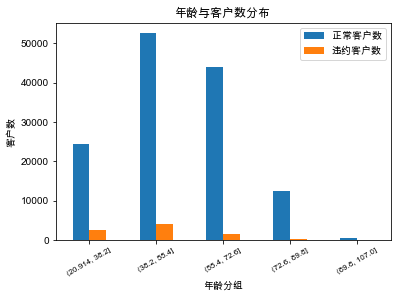

In [12]:
ax11 = df1[["正常客户数","违约客户数"]].plot.bar()
ax11.set_xticklabels(df1.index,rotation=30,fontsize=8)
ax11.set_xlabel("年龄分组")
ax11.set_ylabel("客户数")
ax11.set_title("年龄与客户数分布")

Text(0.5, 1.0, '违约客户占比随年龄的变化趋势')

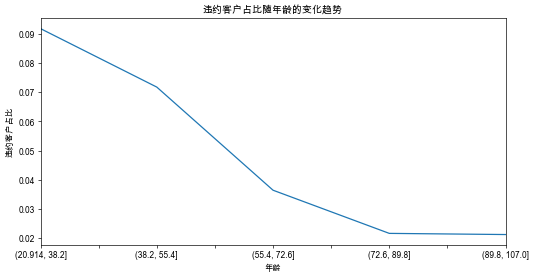

In [13]:
#折线图观察违约客户占比随年龄变化趋势
plt.figure(figsize=(10,5),dpi=60)
ax12 = df1["违约客户占比"].plot()
ax12.set_ylabel("违约客户占比")
ax12.set_title("违约客户占比随年龄的变化趋势")

可以看出，在38-55岁这个区间的客户人数最多，其中正常客户和违约客户的人数均为最高。随着年龄增长，违约客户占比逐渐降低，在38-72岁这个区间，降低幅度最大。

Text(0, 0.5, '月收入')

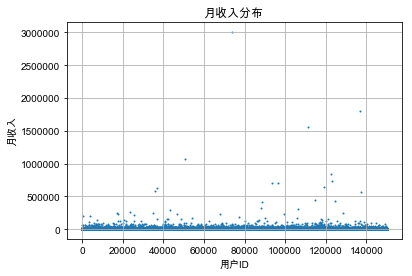

In [14]:
#分析月收入与客户违约是否有关系
#查看收入的分布情况
fig = plt.figure()
ax21 = fig.add_subplot(111) 
ax21.scatter(df["用户ID"],df["月收入"],s=1)
plt.grid()
ax21.set_title("月收入分布")
ax21.set_xlabel("用户ID")
ax21.set_ylabel("月收入")

Text(0.5, 1.0, '100000以内月收入分布')

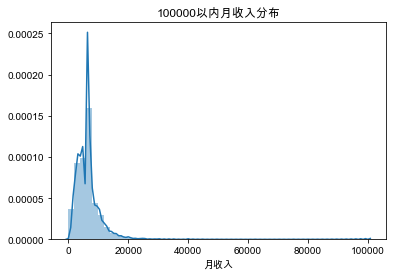

In [15]:
#可以看出月收入基本上都位于0-100000的区间内，为了看得更详细，我们再查看收入在0-100000区间内的分布情况
df2 = df[df["月收入"]<=100000]
plt.figure()
ax22 = sns.distplot(df2["月收入"],bins=50)
ax22.set_title("100000以内月收入分布")

In [16]:
#参考以上月收入的分布情况，我们按照月收入对客户进行分组
income_bins = [0,5000,10000,15000,20000,40000,100000,3000000]
income_cut = pd.cut(df["月收入"],income_bins)
income_cut_grouped = df["是否违约"].groupby(income_cut).count()
income_cut_grouped_bad = df["是否违约"].groupby(income_cut).sum()
df3 = pd.merge(pd.DataFrame(income_cut_grouped),
              pd.DataFrame(income_cut_grouped_bad),
              left_index=True,right_index=True)
df3.rename(columns={"是否违约_x":"客户总数","是否违约_y":"违约客户数"},inplace=True)
df3.insert(2,"正常客户数",df3["客户总数"]-df3["违约客户数"])
df3.insert(3,"违约客户占比",df3["违约客户数"]/df3["客户总数"])
df3

,客户总数,违约客户数,正常客户数,违约客户占比
月收入,,,,
"(0, 5000]",52400,3989,48411,0.076126
"(5000, 10000]",70482,3713,66769,0.052680
"(10000, 15000]",12875,509,12366,0.039534
"(15000, 20000]",3128,119,3009,0.038043
"(20000, 40000]",1628,80,1548,0.049140
"(40000, 100000]",374,23,351,0.061497
"(100000, 3000000]",68,3,65,0.044118


Text(0.5, 1.0, '月收入与客户数分布')

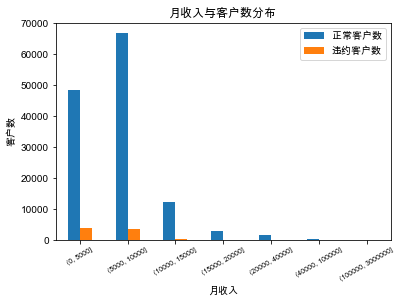

In [17]:
ax23 = df3[["正常客户数","违约客户数"]].plot.bar()
ax23.set_xticklabels(df3.index,rotation=30,fontsize=7)
ax23.set_xlabel("月收入")
ax23.set_ylabel("客户数")
ax23.set_title("月收入与客户数分布")

Text(0.5, 1.0, '违约客户占比随收入变化情况')

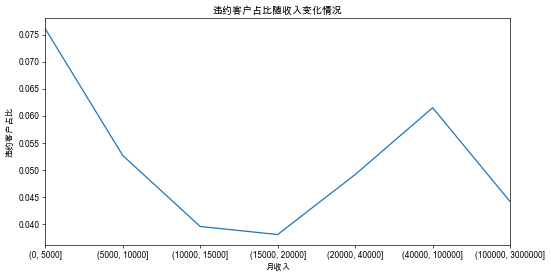

In [18]:
#折线图观察违约客户占比随月收入变化趋势
plt.figure(figsize=(10,5),dpi=60)
ax24 = df3["违约客户占比"].plot()
ax24.set_ylabel("违约客户占比")
ax24.set_title("违约客户占比随收入变化情况")

可以看出，客户人数主要集中在收入10000以下的群体中。在0-15000的收入区间内，违约客户占比随收入增加有明显下降，在15000-20000的区间内，下降趋势变缓。在20000-100000的区间内，违约客户占比又明显升高。可能是因为在0-15000收入区间内的群体，收入来源比较固定，随着收入增加，偿还能力提高，违约率会下降。而收入在20000-100000内的群体，大多不是从事普通工作，收入来源相对不太稳定，会出现违约率升高的情况。而收入在100000-300000内的群体，由于人数非常少，不足以从中得出趋势变化结论。

Text(0, 0.5, '亲属数量')

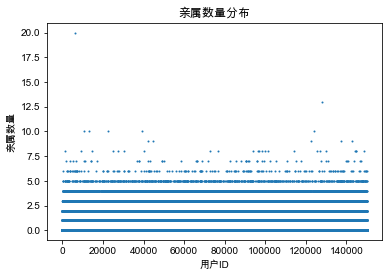

In [19]:
#分析亲属数量与违约客户占比是否有关系
#先观察亲属数量分布情况
fig = plt.figure()
ax31 = fig.add_subplot(111)
ax31.scatter(df["用户ID"],df["亲属数量"],s=1)
ax31.set_title("亲属数量分布")
ax31.set_xlabel("用户ID")
ax31.set_ylabel("亲属数量")

In [20]:
depend_bins = [0,1,2,3,4,5,20]
depend_cut = pd.cut(df["亲属数量"],depend_bins,right=False)
depend_cut_grouped = df["是否违约"].groupby(depend_cut).count()
depend_cut_grouped_bad = df["是否违约"].groupby(depend_cut).sum()
df4 = pd.merge(pd.DataFrame(depend_cut_grouped),
              pd.DataFrame(depend_cut_grouped_bad),
              left_index=True, right_index=True)
df4.rename(columns={"是否违约_x":"客户总数","是否违约_y":"违约客户数"},inplace=True)
df4.insert(2,"正常客户数",df4["客户总数"]-df4["违约客户数"])
df4.insert(3,"违约客户占比",df4["违约客户数"]/df4["客户总数"])
df4

,客户总数,违约客户数,正常客户数,违约客户占比
亲属数量,,,,
"[0, 1)",84986,4392,80594,0.051679
"[1, 2)",25652,1675,23977,0.065297
"[2, 3)",18979,1360,17619,0.071658
"[3, 4)",9220,735,8485,0.079718
"[4, 5)",2764,247,2517,0.089363
"[5, 20)",957,85,872,0.088819


Text(0.5, 1.0, '亲属数量与客户数分布')

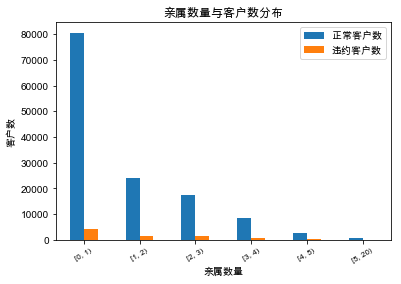

In [21]:
ax32 = df4[["正常客户数","违约客户数"]].plot.bar()
ax32.set_xticklabels(df4.index,rotation=30,fontsize=8)
ax32.set_ylabel("客户数")
ax32.set_title("亲属数量与客户数分布")

Text(0.5, 1.0, '违约客户占比随亲属数量变化情况')

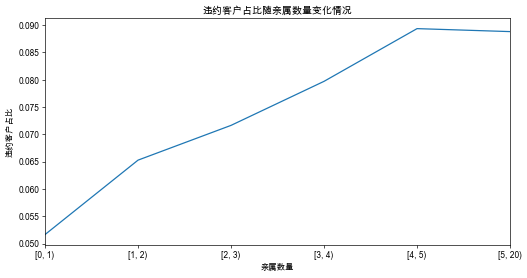

In [22]:
plt.figure(figsize=(10,5),dpi=60)
ax33 = df4["违约客户占比"].plot()
ax33.set_ylabel("违约客户占比")
ax33.set_title("违约客户占比随亲属数量变化情况")

客户的亲属数量绝大多数在4个以内。随着亲属数量增多，违约客户占比增大，当亲属数量达到5个以上时，违约比例不再有明显的上升。可以理解为，亲属数量增多的话，家庭支出更多，因此还不上借款的风险增加。

Text(0.5, 1.0, '逾期90天次数分布')

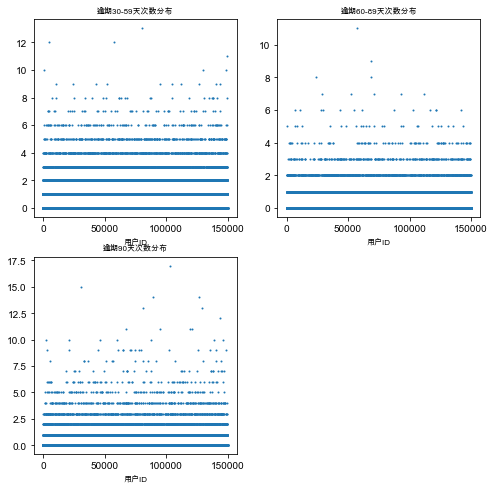

In [23]:
#分析逾期情况与客户违约是否有关
#逾期次数分布
fig = plt.figure(figsize=(8,8))
ax41 = fig.add_subplot(2,2,1)
ax42 = fig.add_subplot(2,2,2)
ax43 = fig.add_subplot(2,2,3)

ax41.scatter(df["用户ID"],df["逾期30-59天次数"],s=1)
ax41.set_xlabel("用户ID",fontsize=8)
ax41.set_title("逾期30-59天次数分布",fontsize=8)
ax42.scatter(df["用户ID"],df["逾期60-89天次数"],s=1)
ax42.set_xlabel("用户ID",fontsize=8)
ax42.set_title("逾期60-89天次数分布",fontsize=8)
ax43.scatter(df["用户ID"],df["逾期90天次数"],s=1)
ax43.set_xlabel("用户ID",fontsize=8)
ax43.set_title("逾期90天次数分布",fontsize=8)

In [24]:
bins_30 = [0,1,2,3,4,5,14]
bins_60 = [0,1,2,3,4,12]
bins_90 = [0,1,2,3,4,18]
past30_cut = pd.cut(df["逾期30-59天次数"],bins_30,right=False)
past60_cut = pd.cut(df["逾期60-89天次数"],bins_60,right=False)
past90_cut = pd.cut(df["逾期90天次数"],bins_90,right=False)

past30_cut_grouped = df["是否违约"].groupby(past30_cut).count()
past30_cut_grouped_bad = df["是否违约"].groupby(past30_cut).sum()
df30 = pd.merge(pd.DataFrame(past30_cut_grouped),
               pd.DataFrame(past30_cut_grouped_bad),
               left_index=True,right_index=True)
df30.rename(columns={"是否违约_x":"客户总数","是否违约_y":"违约客户数"},inplace=True)
df30.insert(2,"正常客户数",df30["客户总数"]-df30["违约客户数"])
df30.insert(3,"违约客户占比",df30["违约客户数"]/df30["客户总数"])

past60_cut_grouped = df["是否违约"].groupby(past60_cut).count()
past60_cut_grouped_bad = df["是否违约"].groupby(past60_cut).sum()
df60 = pd.merge(pd.DataFrame(past60_cut_grouped),
               pd.DataFrame(past60_cut_grouped_bad),
               left_index=True,right_index=True)
df60.rename(columns={"是否违约_x":"客户总数","是否违约_y":"违约客户数"},inplace=True)
df60.insert(2,"正常客户数",df60["客户总数"]-df60["违约客户数"])
df60.insert(3,"违约客户占比",df60["违约客户数"]/df60["客户总数"])

past90_cut_grouped = df["是否违约"].groupby(past90_cut).count()
past90_cut_grouped_bad = df["是否违约"].groupby(past90_cut).sum()
df90 = pd.merge(pd.DataFrame(past90_cut_grouped),
               pd.DataFrame(past90_cut_grouped_bad),
               left_index=True,right_index=True)
df90.rename(columns={"是否违约_x":"客户总数","是否违约_y":"违约客户数"},inplace=True)
df90.insert(2,"正常客户数",df90["客户总数"]-df90["违约客户数"])
df90.insert(3,"违约客户占比",df90["违约客户数"]/df90["客户总数"])

df30


,客户总数,违约客户数,正常客户数,违约客户占比
逾期30-59天次数,,,,
"[0, 1)",120918,4577,116341,0.037852
"[1, 2)",14913,2010,12903,0.134782
"[2, 3)",4102,977,3125,0.238176
"[3, 4)",1518,472,1046,0.310935
"[4, 5)",628,249,379,0.396497
"[5, 14)",480,209,271,0.435417


In [25]:
df60

,客户总数,违约客户数,正常客户数,违约客户占比
逾期60-89天次数,,,,
"[0, 1)",136232,6439,129793,0.047265
"[1, 2)",5080,1439,3641,0.283268
"[2, 3)",883,415,468,0.469989
"[3, 4)",238,131,107,0.550420
"[4, 12)",126,70,56,0.555556


In [26]:
df90

,客户总数,违约客户数,正常客户数,违约客户占比
逾期90天次数,,,,
"[0, 1)",135639,5823,129816,0.042930
"[1, 2)",4647,1472,3175,0.316764
"[2, 3)",1281,612,669,0.477752
"[3, 4)",529,296,233,0.559546
"[4, 18)",463,291,172,0.628510


Text(0.5, 1.0, '逾期90天次数与客户数分布')

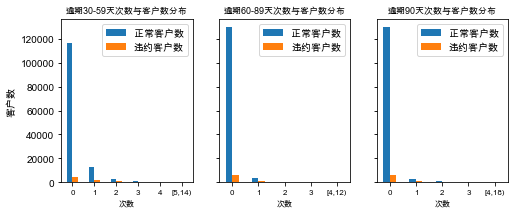

In [27]:
fig,axes = plt.subplots(1,3,sharey=True,figsize=(8,3))
ax30 = df30[["正常客户数","违约客户数"]].plot.bar(ax=axes[0])
ax60 = df60[["正常客户数","违约客户数"]].plot.bar(ax=axes[1])
ax90 = df90[["正常客户数","违约客户数"]].plot.bar(ax=axes[2])
ax30.set_ylabel("客户数")
ax30.set_xticklabels([0,1,2,3,4,"[5,14)"],rotation=0,fontsize=8)
ax60.set_xticklabels([0,1,2,3,"[4,12)"],rotation=0,fontsize=8)
ax90.set_xticklabels([0,1,2,3,"[4,18)"],rotation=0,fontsize=8)
ax30.set_xlabel("次数",fontsize=8)
ax60.set_xlabel("次数",fontsize=8)
ax90.set_xlabel("次数",fontsize=8)
ax30.set_title("逾期30-59天次数与客户数分布",fontsize=9)
ax60.set_title("逾期60-89天次数与客户数分布",fontsize=9)
ax90.set_title("逾期90天次数与客户数分布",fontsize=9)

Text(0.5, 0.98, '违约客户占比随逾期次数变化情况')

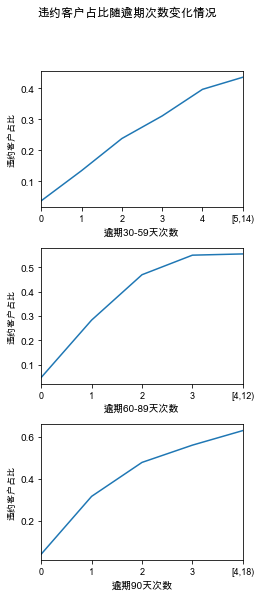

In [28]:
fig,axes = plt.subplots(3,1,figsize=(4,9))

ax301 = df30["违约客户占比"].plot(ax=axes[0])
ax601 = df60["违约客户占比"].plot(ax=axes[1])
ax901 = df90["违约客户占比"].plot(ax=axes[2])
plt.subplots_adjust(left=0.2,hspace=0.3,top=None)
ax301.set_ylabel("违约客户占比",fontsize=9)
ax601.set_ylabel("违约客户占比",fontsize=9)
ax901.set_ylabel("违约客户占比",fontsize=9)
ax301.set_xticklabels([0,1,2,3,4,"[5,14)"],fontsize=9)
ax601.set_xticklabels([0,1,2,3,"[4,12)"],fontsize=9)
ax901.set_xticklabels([0,1,2,3,"[4,18)"],fontsize=9)
fig.suptitle("违约客户占比随逾期次数变化情况")


在几个逾期期限内，表现为随着逾期次数增多，违约客户占比上升。可以解释为，发生过多次逾期的用户，经济状况更不稳定，更容易产生坏账。

以上对违约客户可能具有的特征进行了分析，可以看出，较年轻、收入偏低或者是收入很高在20000-100000这个区间、亲属数量较多、之前有过数次逾期的客户，更容易发生违约风险。

接下来检验变量之间的相关性，如果变量之间相关性显著，会使模型估计产生偏差，则在建模时可以减少一些变量，避免出现过拟合。

[Text(0, 0.5, '用户ID'),
 Text(0, 1.5, '是否违约'),
 Text(0, 2.5, '可用额度比值'),
 Text(0, 3.5, '年龄'),
 Text(0, 4.5, '逾期30-59天次数'),
 Text(0, 5.5, '负债率'),
 Text(0, 6.5, '月收入'),
 Text(0, 7.5, '信贷数量'),
 Text(0, 8.5, '逾期90天次数'),
 Text(0, 9.5, '不动产贷款量'),
 Text(0, 10.5, '逾期60-89天次数'),
 Text(0, 11.5, '亲属数量')]

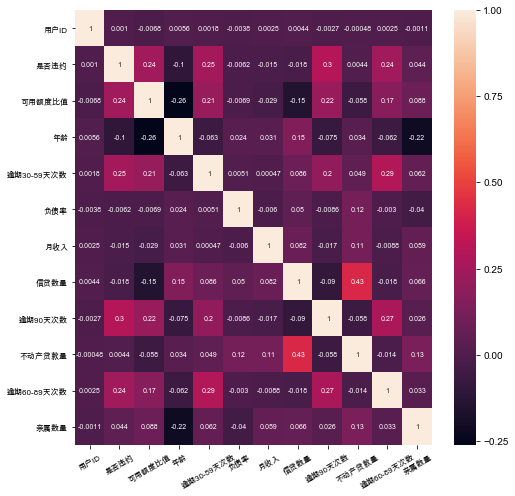

In [29]:
corr = df.corr()
xticks = list(corr.index)
yticks = list(corr.index)
plt.figure(figsize=(8,8))
ax5 = sns.heatmap(corr,annot=True,annot_kws={'size':7})
ax5.set_xticklabels(xticks,fontsize=8,rotation=30)
ax5.set_yticklabels(yticks,fontsize=8)


建模之前要进行特征选择，特征选择最重要的是要考虑特征对应变量的预测能力，过滤掉一些对于目标变量影响权重较小的特征。常用的评价指标有IV值、信息增益、基尼系数等。这里我们选用评分卡模型中常用的IV值来进行筛选。

In [30]:
#WOE分组
cut1 = pd.qcut(df["可用额度比值"],4)
cut2 = pd.qcut(df["年龄"],8)
bins3 = [-1,0,1,3,5,13]
cut3 = pd.cut(df["逾期30-59天次数"],bins3)
cut4 = pd.qcut(df["负债率"],3)
cut5 = pd.qcut(df["月收入"],4)
cut6 = pd.qcut(df["信贷数量"],4)
bins7 = [-1,0,1,3,5,20]
cut7 = pd.cut(df["逾期90天次数"],bins7)
bins8 = [-1,0,1,2,3,33]
cut8 = pd.cut(df["不动产贷款量"],bins8)
bins9 = [-1,0,1,3,12]
cut9 = pd.cut(df["逾期60-89天次数"],bins9)
bins10 = [-1,0,1,2,3,5,21]
cut10 = pd.cut(df["亲属数量"],bins10)
cut1.unique()

[(0.521, 1.0], (0.148, 0.521], (-0.001, 0.0295], (0.0295, 0.148]]
Categories (4, interval[float64]): [(-0.001, 0.0295] < (0.0295, 0.148] < (0.148, 0.521] < (0.521, 1.0]]

In [31]:
#计算WOE值，分组内响应和未响应的比值/总体响应和未响应比值 的对数
#总体的违约客户比率
rate = df["是否违约"].sum()/df["是否违约"].count()

def get_woe(cut):
    grouped = df["是否违约"].groupby(cut).value_counts()
    grouped = grouped.unstack()
    woe = np.log(grouped.iloc[:,1]/grouped.iloc[:,0]/rate)
    return woe

cut1_woe = get_woe(cut1)
cut2_woe = get_woe(cut2)
cut3_woe = get_woe(cut3)
cut4_woe = get_woe(cut4)
cut5_woe = get_woe(cut5)
cut6_woe = get_woe(cut6)
cut7_woe = get_woe(cut7)
cut8_woe = get_woe(cut8)
cut9_woe = get_woe(cut9)
cut10_woe = get_woe(cut10)

[Text(0, 0, '可用额度比值'),
 Text(0, 0, '年龄'),
 Text(0, 0, '逾期30-59天次数'),
 Text(0, 0, '负债率'),
 Text(0, 0, '月收入'),
 Text(0, 0, '信贷数量'),
 Text(0, 0, '逾期90天次数'),
 Text(0, 0, '不动产贷款量'),
 Text(0, 0, '逾期60-89天次数'),
 Text(0, 0, '亲属数量')]

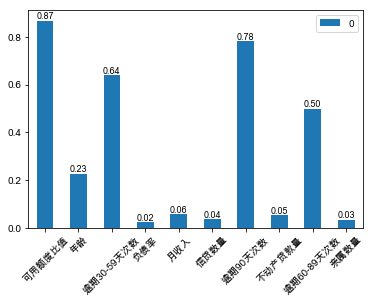

In [32]:
#计算IV值 （分组内响应占总体响应比率-分组内未响应占总体未响应比率）*WOE
def get_IV(cut,cut_woe):
    grouped = df["是否违约"].groupby(cut).value_counts()
    grouped = grouped.unstack()
    IV = ((grouped.iloc[:,1]/df["是否违约"].sum()-grouped.iloc[:,0]/
           (df["是否违约"].count()-df["是否违约"].sum()))*cut_woe).sum()
    return IV

cut1_IV = get_IV(cut1,cut1_woe)
cut2_IV = get_IV(cut2,cut2_woe)
cut3_IV = get_IV(cut3,cut3_woe)
cut4_IV = get_IV(cut4,cut4_woe)
cut5_IV = get_IV(cut5,cut5_woe)
cut6_IV = get_IV(cut6,cut6_woe)
cut7_IV = get_IV(cut7,cut7_woe)
cut8_IV = get_IV(cut8,cut8_woe)
cut9_IV = get_IV(cut9,cut9_woe)
cut10_IV = get_IV(cut10,cut10_woe)

df_IV = pd.DataFrame([cut1_IV,cut2_IV,cut3_IV,cut4_IV,cut5_IV,cut6_IV,cut7_IV,cut8_IV,cut9_IV,cut10_IV],
                    index=df.columns[2:])
ax = df_IV.plot.bar()
for a,b in zip(range(10),df_IV.values):
    plt.text(a,b,'%.2f' % b, ha='center', va='bottom',fontsize=9)
ax.set_xticklabels(df_IV.index,rotation=45)

可以看出，“负债率”、“月收入”、“信贷数量”、“不动产贷款量”、“亲属数量”这几个特征的IV值很低，表示对应变量的影响比较小，所以将这些指标过滤掉。

In [33]:
#将原始数据用离散化后的woe值替换
def replace_data(cut,cut_woe):
    a = []
    for i in cut.unique():
        a.append(i)
        a.sort()    
    for j in range(len(a)):
        cut.replace(a[j],cut_woe.values[j],inplace=True)
    return cut

df_new = pd.DataFrame()
df_new["是否违约"] = df["是否违约"]
df_new["可用额度比值"] = replace_data(cut1,cut1_woe)
df_new["年龄"] = replace_data(cut2,cut2_woe)
df_new["逾期30-59天次数"] = replace_data(cut3,cut3_woe)
df_new["逾期90天次数"] = replace_data(cut7,cut7_woe)
df_new["逾期60-89天次数"] = replace_data(cut9,cut9_woe)
df_new.head(5)

,是否违约,可用额度比值,年龄,逾期30-59天次数,逾期90天次数,逾期60-89天次数
0,1,1.105899,0.308401,1.763114,-0.283907,-0.183172
1,0,1.105899,0.378321,-0.415086,-0.283907,-0.183172
2,0,1.105899,0.378321,0.961071,2.051710,-0.183172
3,0,-0.185964,0.579597,-0.415086,-0.283907,-0.183172
4,0,1.105899,0.227946,0.961071,-0.283907,-0.183172


In [34]:
#模型训练
#采用信用评分卡常用的逻辑回归算法来进行模型训练

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics

x = df_new.iloc[:,1:]
y = df_new.iloc[:,0]

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3)
clf = LogisticRegression(solver='liblinear').fit(x_train,y_train)
predicted = clf.predict(x_test)

print("准确率为：",metrics.accuracy_score(y_test,predicted))


准确率为： 0.9416619902731014


得到的模型预测准确率为0.9417，说明训练结果还不错。

In [35]:
coefs = clf.coef_
coefs

array([[0.65879931, 0.53643728, 0.55803354, 0.60597197, 0.41908556]])

In [36]:
#设基础分值为500分，坏好比为1/20，坏好比减小一倍分数加20分。score=q-p*log(坏/好)
p = 20/np.log(2)
q = 500 - 20*np.log(20)/np.log(2)

#根据得到的模型中各变量的相关系数coef，计算每个woe值对应的得分
def get_score(coef,woe,factor):
    scores = []
    for w in woe:
        score = round(coef*w*factor,0)
        scores.append(score)
    return scores

#计算每个变量中各种分箱的得分
score1 = get_score(coefs[0][0],cut1_woe,p)
score2 = get_score(coefs[0][1],cut2_woe,p)
score3 = get_score(coefs[0][2],cut3_woe,p)
score7 = get_score(coefs[0][3],cut7_woe,p)
score9 = get_score(coefs[0][4],cut9_woe,p)

#显示每个变量对应的得分列表
print("可用额度比值各分组对应的得分:",score1)
print("年龄各分组对应的得分:",score2)
print("逾期30-59天次数各分组对应的得分:",score3)
print("逾期90天次数各分组对应的得分:",score7)
print("逾期60-89天次数各分组对应的得分:",score9)

可用额度比值各分组对应的得分: [-22.0, -20.0, -4.0, 21.0]
年龄各分组对应的得分: [9.0, 6.0, 5.0, 4.0, 1.0, -5.0, -12.0, -15.0]
逾期30-59天次数各分组对应的得分: [-7.0, 15.0, 28.0, 39.0, 43.0]
逾期90天次数各分组对应的得分: [-5.0, 36.0, 49.0, 58.0, 59.0]
逾期60-89天次数各分组对应的得分: [-2.0, 23.0, 33.0, 37.0]


In [37]:
#可得到评分卡
score_card = pd.DataFrame({'变量':['可用额度比值','可用额度比值','可用额度比值','可用额度比值',
                                '年龄','年龄','年龄','年龄','年龄','年龄','年龄','年龄',
                                '逾期30-59天次数','逾期30-59天次数','逾期30-59天次数','逾期30-59天次数','逾期30-59天次数',
                                '逾期90天次数','逾期90天次数','逾期90天次数','逾期90天次数','逾期90天次数',
                                '逾期60-89天次数','逾期60-89天次数','逾期60-89天次数','逾期60-89天次数',],
                           '分组':['(-0.001, 0.0295]','(0.0295, 0.148]','(0.148, 0.521]','(0.521, 1.0]',
                                '(20.999, 35.0]','(35.0, 41.0]','(41.0, 47.0]','(47.0, 52.0]','(52.0, 57.0]',
                                '(57.0, 63.0]','(63.0, 70.0]','(70.0, 107.0]',
                                '(-1, 0]','(0, 1]','(1, 3]','(3, 5]','(5, 13]',
                                '(-1, 0]','(0, 1]','(1, 3]','(3, 5]','(5, 20]',
                                '(-1, 0]','(0, 1]','(1, 3]','(3, 12]'],
                           '计分':[-21.0, -20.0, -3.0, 21.0,
                                 9.0, 6.0, 5.0, 4.0, 1.0, -5.0, -12.0, -15.0,
                                -7.0, 15.0, 28.0, 39.0, 43.0,
                                -5.0, 35.0, 48.0, 57.0, 57.0,
                                -2.0, 24.0, 35.0, 38.0]
                           })
score_card

,变量,分组,计分
0,可用额度比值,"(-0.001, 0.0295]",-21.0
1,可用额度比值,"(0.0295, 0.148]",-20.0
2,可用额度比值,"(0.148, 0.521]",-3.0
3,可用额度比值,"(0.521, 1.0]",21.0
4,年龄,"(20.999, 35.0]",9.0
5,年龄,"(35.0, 41.0]",6.0
6,年龄,"(41.0, 47.0]",5.0
7,年龄,"(47.0, 52.0]",4.0
8,年龄,"(52.0, 57.0]",1.0
9,年龄,"(57.0, 63.0]",-5.0


根据上述评分卡，将某一用户的各特征变量对应到评分卡中的分组区间，得到每个变量的评分，最后由总评分=500-(各变量评分和）得到总得分，得分越低表示违约风险越大。例如：可用额度比值0.8、年龄40、逾期30-59天次数3、逾期90天次数0、逾期60-89天次数1，可得到这个用户的总评分=500-(21+6+28-5+24)=426